In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
heart_dataset=pd.read_csv("heart.csv")

In [3]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#DATA NORMLIZATION
features_to_normalize = ['age','chol','thalach','sex','cp','trestbps','fbs','restecg','exang','oldpeak','slope','ca','thal']
for feature in features_to_normalize:
    max_value = heart_dataset[feature].max()
    min_value = heart_dataset[feature].min()
    heart_dataset[feature] = (heart_dataset[feature] - min_value) / (max_value - min_value)
    
    
print(heart_dataset.head()) 

        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   

    oldpeak  slope    ca      thal  target  
0  0.161290    1.0  0.50  1.000000       0  
1  0.500000    0.0  0.00  1.000000       0  
2  0.419355    0.0  0.00  1.000000       0  
3  0.000000    1.0  0.25  1.000000       0  
4  0.306452    0.5  0.75  0.666667       0  


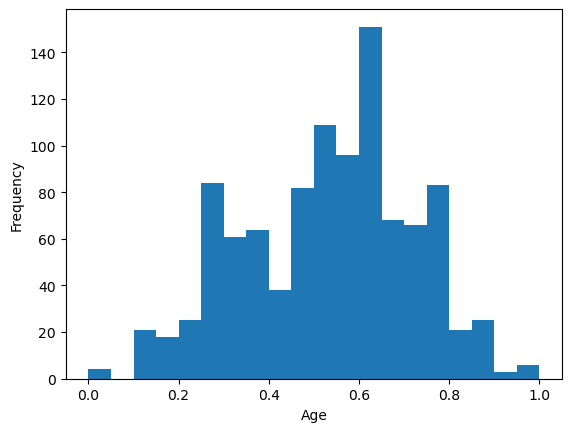

In [5]:
#HISTOGRAM FOR AGE COLUMN
plt.hist(heart_dataset['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [6]:
#MEAN AND STANDARD DEVIATION OF AGE
age_mean = heart_dataset['age'].mean()
age_std = heart_dataset['age'].std()

In [7]:
#threshold for outliers to 3 standard deviations from the mean
threshold = age_mean + (3 * age_std)

In [8]:
#Identify outliers in the 'age' column
outliers = heart_dataset[heart_dataset['age'] > threshold]

In [9]:
#print outliers detected in the 'age' column
print(f"Number of outliers detected in 'age' column: {len(outliers)}")

Number of outliers detected in 'age' column: 0


In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [5]:
#dropping the target column and creating feature matrix X
X = heart_dataset.drop(['target'],axis=1)
#creating target varible y
y=heart_dataset['target']
#spliting data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#scalling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#craeting svm classifier object and fitting the model
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

#makin prediction on data
y_pread = svm.predict(X_test)

#calculating the accuracy and confusion matrix
accuracy = accuracy_score(y_test,y_pread)
confusion = confusion_matrix(y_test,y_pread)

#printing the result
print("Accuracy:",accuracy)
print("confusion martrix:\n",confusion)

Accuracy: 0.8146341463414634
confusion martrix:
 [[72 30]
 [ 8 95]]


In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
X = heart_dataset.iloc[:, :-1].values
y = heart_dataset.iloc[:, -1].values

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# train ANN classifier
clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)
clf.fit(X_train, y_train)

# predict target variable
y_pred = clf.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

[[100   2]
 [  0 103]]
accuracy: 0.9902439024390244


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
from sklearn.naive_bayes import GaussianNB

# Creating Naive Bayes classifier object and fitting the model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Making predictions on test data
y_pred = nb.predict(X_test)

# Calculating the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Printing the results
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion)


Accuracy: 0.8
Confusion matrix:
 [[72 30]
 [11 92]]


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
# split data into features and target variable
X = heart_dataset.iloc[:, :-1].values
y = heart_dataset.iloc[:, -1].values

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# predict target variable
y_pred = clf.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

[[102   0]
 [  3 100]]
Accuracy: 0.9853658536585366


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# split data into features and target variable
X = heart_dataset.iloc[:, :-1].values
y = heart_dataset.iloc[:, -1].values

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# predict target variable
y_pred = clf.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

[[102   0]
 [  3 100]]
Accuracy: 0.9853658536585366


In [18]:
import xgboost as xgb

In [19]:
X = heart_dataset.iloc[:, :-1].values
y = heart_dataset.iloc[:, -1].values

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train XGBoost classifier
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3, 'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 50
clf = xgb.train(params, dtrain, num_round)

# predict target variable
y_pred = clf.predict(dtest)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

[[87 15]
 [ 9 94]]
Accuracy: 0.8829268292682927


In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
X = heart_dataset.iloc[:, :-1].values
y = heart_dataset.iloc[:, -1].values

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# predict target variable
y_pred = clf.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

[[94  8]
 [14 89]]
Accuracy: 0.8926829268292683


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load data


# Split data into features and target
X = heart_dataset.drop('target', axis=1)
y = heart_dataset['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)


Confusion Matrix:
[[71 31]
 [13 90]]
Accuracy: 0.7853658536585366


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
